In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
churn_data=pd.read_csv("churn_data.csv")
customer_data=pd.read_csv("customer_data.csv")
internet_data=pd.read_csv("internet_data.csv")

In [67]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [69]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [70]:
print(churn_data.shape)
print(customer_data.shape)
print(internet_data.shape)

(7042, 9)
(7042, 5)
(7042, 9)


In [71]:
merge1=pd.merge(churn_data,customer_data, how='outer')

In [72]:
merge1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [73]:
merge1.shape

(7042, 13)

In [74]:
merge2=pd.merge(merge1,internet_data, how='outer')
data=merge2

In [75]:
data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [76]:
data.describe(include='O')

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042
unique,7042,2,3,2,4,6530,2,2,2,2,3,3,3,3,3,3,3,3
top,7590-VHVEG,Yes,Month-to-month,Yes,Electronic check,,No,Male,No,No,No,Fiber optic,No,No,No,No,No,No
freq,1,6360,3875,4170,2365,11,5173,3554,3640,4932,3389,3095,3498,3087,3095,3473,2810,2785


In [77]:
data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [79]:
#Actually Total charges should be in int or float but here it is showing object

In [80]:
data['TotalCharges'].values#here the values are in quotes so it is showing as object

array(['29.85', '1889.5', '108.15', ..., '7362.9', '346.45', '306.6'],
      dtype=object)

In [81]:
#pd.to_numeric(data['TotalCharges'])#to convert number(Actually this code will convert string values into numbers but here is shows error because it contains only space no value)

In [82]:
charges = data['TotalCharges']

for index in range(0, len(charges)):
    try :
        skip = float(charges[index])
    except ValueError :
        print(index, charges[index])
#here it will display the index values and the corresponding number here it is showing that there are some blank spaces in Total charges column

488  
753  
936  
1082  
1340  
3331  
3826  
4380  
5218  
6670  
6754  


In [83]:
data.iloc[488]

customerID                         4472-LVYGI
tenure                                      0
PhoneService                               No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Name: 488, dtype: object

In [84]:
data.iloc[488]['TotalCharges']

' '

In [85]:
spaces=data.loc[data['TotalCharges']==" "]
spaces

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,0,No,Two year,Yes,Bank transfer (automatic),52.55,,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,,No,Male,...,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,,No,Female,...,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,0,Yes,Two year,No,Mailed check,25.75,,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,1371-DWPAZ,0,No,Two year,No,Credit card (automatic),56.05,,No,Female,...,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,0,Yes,Two year,No,Mailed check,19.85,,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,,No,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,4075-WKNIU,0,Yes,Two year,No,Mailed check,73.35,,No,Female,...,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [86]:
spaces.shape

(11, 21)

In [88]:
spaces_index=data.loc[data['TotalCharges']==" "].index
spaces_index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [89]:
data=data.drop(spaces_index, axis=0)
data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No


In [90]:
data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No


In [91]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])#now it will not give error 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7031 non-null   object 
 1   tenure            7031 non-null   int64  
 2   PhoneService      7031 non-null   object 
 3   Contract          7031 non-null   object 
 4   PaperlessBilling  7031 non-null   object 
 5   PaymentMethod     7031 non-null   object 
 6   MonthlyCharges    7031 non-null   float64
 7   TotalCharges      7031 non-null   float64
 8   Churn             7031 non-null   object 
 9   gender            7031 non-null   object 
 10  SeniorCitizen     7031 non-null   int64  
 11  Partner           7031 non-null   object 
 12  Dependents        7031 non-null   object 
 13  MultipleLines     7031 non-null   object 
 14  InternetService   7031 non-null   object 
 15  OnlineSecurity    7031 non-null   object 
 16  OnlineBackup      7031 non-null   object 


In [93]:
data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

# Visualizations

In [94]:
#Tenure implies how loyal the customer is, we want to know how many loyal customers are leaving

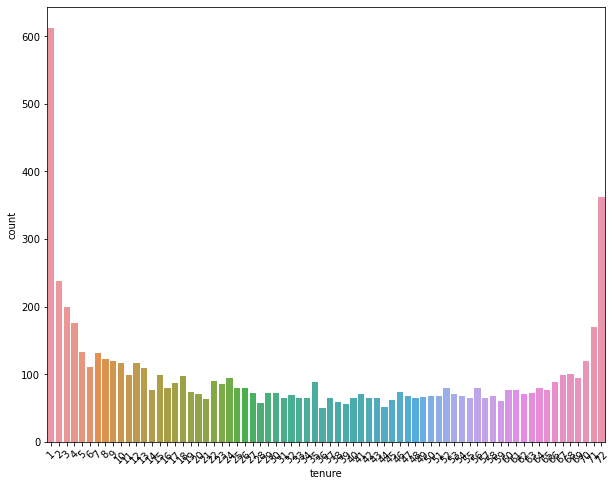

In [95]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,8))
sns.countplot(data['tenure'])
plt.xticks(rotation=45)
plt.show()

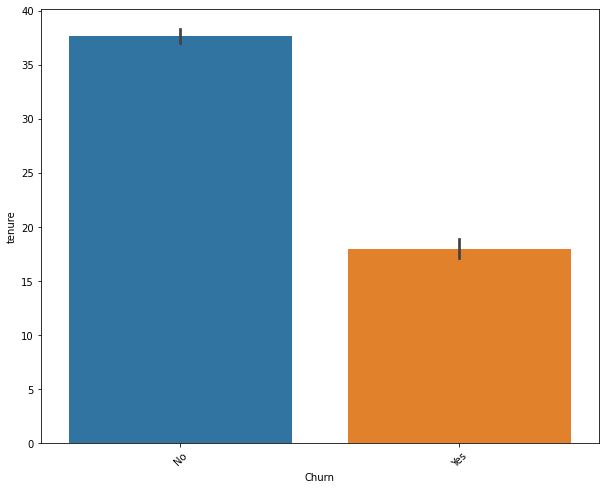

In [96]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['Churn'],y=data['tenure'], )
plt.xticks(rotation=45)
plt.show()

In [97]:
data[data['Churn']=='No']

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Male,...,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.90,No,Female,...,No,No,No phone service,DSL,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,12,No,One year,No,Electronic check,60.65,743.30,No,Female,...,No,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


In [98]:
data[data['Churn']=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7036    12
7037    72
7038    24
7039    72
7040    11
Name: tenure, Length: 5162, dtype: int64

In [99]:
churn_no=data[data['Churn']=='No']
churn_no

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Male,...,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.90,No,Female,...,No,No,No phone service,DSL,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,12,No,One year,No,Electronic check,60.65,743.30,No,Female,...,No,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


In [100]:
churn_yes=data[data['Churn']=='Yes']
churn_yes

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Female,...,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,...,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
13,0280-XJGEX,49,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Male,...,No,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,12,Yes,One year,Yes,Electronic check,59.80,727.80,Yes,Male,...,No,No,No,DSL,No,No,No,Yes,Yes,No
7026,8775-CEBBJ,9,Yes,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,Female,...,No,No,No,DSL,No,No,No,No,No,No
7032,6894-LFHLY,1,Yes,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,Male,...,No,No,Yes,Fiber optic,No,No,No,No,No,No
7034,0639-TSIQW,67,Yes,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,Female,...,No,No,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No


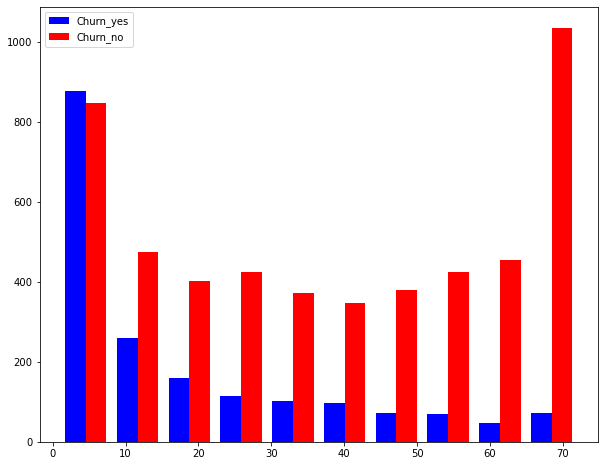

In [101]:
yes=data[data['Churn']=='Yes'].tenure
no=data[data['Churn']=='No'].tenure
plt.figure(figsize=(10,8))
plt.hist([yes, no], color=['blue', 'red'], label=['Churn_yes', 'Churn_no'])
plt.legend()
plt.show()

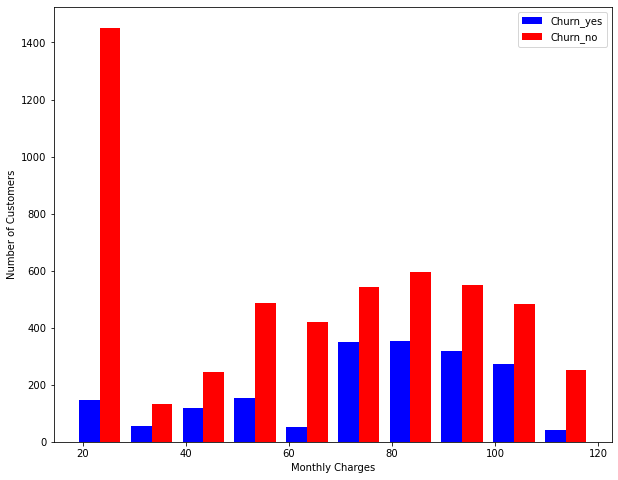

In [102]:
yes=data[data['Churn']=='Yes'].MonthlyCharges
no=data[data['Churn']=='No'].MonthlyCharges
plt.figure(figsize=(10,8))
plt.hist([yes, no], color=['blue', 'red'], label=['Churn_yes', 'Churn_no'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

In [103]:
def print_unique_catdata(data):
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column} : {data[column].unique()}')

In [104]:
print_unique_catdata(data)#here in some columns extra info is also there instead of no like No phone service it implies no, so replace those values with no for one hot encoding

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '2234-XADUH' '4801-JZAZL'
 '8361-LTMKD']
PhoneService : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']


In [105]:
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

In [106]:
print_unique_catdata(data)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '2234-XADUH' '4801-JZAZL'
 '8361-LTMKD']
PhoneService : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']


In [107]:
cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in cols:
    data[col].replace({'Yes':1, 'No':0}, inplace=True)

In [108]:
def print_unique_data(data):
    for column in data:
        print(f'{column} : {data[column].unique()}')

In [109]:
print_unique_data(data)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '2234-XADUH' '4801-JZAZL'
 '8361-LTMKD']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ... 7362.9   346.45  306.6 ]
Churn : [0 1]
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]


In [110]:
data['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [111]:
data.drop(['customerID'], axis=1,inplace=True)

In [112]:
data1=pd.get_dummies(data=data,columns=['InternetService','Contract','PaymentMethod'])
data1.shape

(7031, 27)

In [113]:
data1.sample(5)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6116,48,1,1,73.85,3581.40,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
641,43,1,0,56.15,2499.30,1,1,0,1,1,...,1,0,0,1,0,0,0,0,1,0
5471,29,1,1,74.20,1993.25,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3234,24,1,0,19.70,452.55,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,1
6418,31,1,1,79.30,2484.00,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [114]:
data1.dtypes

tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [115]:
columns_to_scale=['MonthlyCharges','TotalCharges','tenure']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data1[columns_to_scale]=scaler.fit_transform(data1[columns_to_scale])

In [116]:
data1.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0,1,0.115423,0.001275,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0.464789,1,0,0.385075,0.215867,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0.014085,1,1,0.354229,0.010310,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0.619718,0,0,0.239303,0.210241,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0.014085,1,1,0.521891,0.015330,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [117]:
# Define a function to calculate Gini impurity
def gini_impurity(labels):
    classes = np.unique(labels)
    impurity = 1
    for c in classes:
        p = np.sum(labels == c) / len(labels)
        impurity -= p ** 2
    return impurity

# Define a function to split the data based on a feature and threshold
def split_data(X, y, feature, threshold):
    left_indices = np.where(X[:, feature] <= threshold)[0]           
    right_indices = np.where(X[:, feature] > threshold)[0]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split for a given node
def find_best_split(X, y):
    best_feature, best_threshold, best_impurity = None, None, 1
    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_data(X, y, feature, threshold)
            impurity = (len(y_left) / len(y)) * gini_impurity(y_left) + (len(y_right) / len(y)) * gini_impurity(y_right)
            if impurity < best_impurity:
                best_feature, best_threshold, best_impurity = feature, threshold, impurity
    return best_feature, best_threshold

In [118]:
# Define a class for the decision tree
class Node:
    def __init__(self, X, y, depth, max_depth, min_samples_leaf):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None

    def split(self):    # Splits the input data and labels into two subsets based on the best feature and threshold 
        self.feature, self.threshold = find_best_split(self.X, self.y)
        X_left, y_left, X_right, y_right = split_data(self.X, self.y, self.feature, self.threshold)
        if len(y_left) > 0 and len(y_right) > 0 and self.depth < self.max_depth:
            self.left = Node(X_left, y_left, self.depth + 1, self.max_depth, min_samples_leaf)
            self.right = Node(X_right, y_right, self.depth + 1, self.max_depth, min_samples_leaf)

    def predict(self, x):  #Given a new data point x, traverses the tree to predict the class label for x.
        if self.label is not None:
            return self.label
        if x[self.feature] <= self.threshold:
            return self.left.predict(x)
        else:
            return self.right.predict(x)
            

    def fit(self): #trains the decision tree by recursively splitting the data and labels until the stopping criteria are met.
        if len(np.unique(self.y)) == 1: #If all the elements in the target variable y are the same .This node becomes a leaf node
            self.label = self.y[0]
            return
        if self.depth == self.max_depth:
            self.label = np.bincount(self.y.astype(int)).argmax()  #return the index of the highest count.
            return
        if len(y) < self.min_samples_leaf:
            self.label = np.bincount(self.y.astype(int)).argmax()
            return
        self.split()
        if self.left is not None:
            self.left.fit()
        if self.right is not None:
            self.right.fit()


In [122]:
X=data1.drop(['Churn'], axis=1).values
y=data1['Churn'].values

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=30)

In [124]:
# Build the decision tree
min_samples_leaf = 5
tree = Node(X_train, y_train, 0, 10, min_samples_leaf)
tree.fit()

# Define a function to calculate the accuracy of the model
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predict the classes of the test data

y_train_pred = np.array([tree.predict(x) for x in X_train])
y_test_pred = np.array([tree.predict(x) for x in X_test])

# Calculate the accuracy of the model
print('Accuracy-->X_Train Data:', accuracy(y_train, y_train_pred))
print('Accuracy-->X_Test Data:', accuracy(y_test, y_test_pred)) 

Accuracy-->X_Train Data: 0.8758890469416786
Accuracy-->X_Test Data: 0.7626154939587776


In [125]:
# Define a function to calculate recall for a multiclass problem with 3 classes
def recall(y_true, y_pred):
    classes = np.unique(y_true)
    recall_list = []
    for c in classes:
        tp = np.sum((y_true == c) & (y_pred == c))
        fn = np.sum((y_true == c) & (y_pred != c))
        recall = tp / (tp + fn)
        recall_list.append(recall)
    return recall_list

# Calculate the recall of the model
print('Recall-->X_Train Data:', recall(y_train, y_train_pred))

Recall-->X_Train Data: [0.9157384987893462, 0.7657295850066934]
